<a href="https://colab.research.google.com/github/idrkhowto/Stellar-Mass-Estimates-SDSS_DR12/blob/main/SDSS12_Stellar_Mass_Estimates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install astropy

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install astroquery

#Import packages
from astropy.io import fits
from astropy import units
from astropy.table import Table
import numpy as np, pandas as pd

#Astroquery is what we use to download data from SDSS
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy import constants as const

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

import pickle
pickle.HIGHEST_PROTOCOL = 4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 5.1 MB/s 
     |████████████████████████████████| 885 kB 50.3 MB/s 
     |████████████████████████████████| 48 kB 5.2 MB/s 
     |████████████████████████████████| 4.0 MB 49.5 MB/s 


In [3]:
#Load partial stellar mass estimate data from DR12

with fits.open('/content/drive/MyDrive/granada_fsps_krou_wideform_dust-v5_7_2.fits') as hdu:
    
    StellarMassDust_data = Table(hdu[1].data)

with fits.open('/content/drive/MyDrive/granada_fsps_krou_wideform_nodust-v5_7_2.fits') as hdu:
    StellarMassNoDust_data = Table(hdu[1].data)
 
StellarMassDust_data.field('SPECOBJID')

StellarMassDust_data.field(17)
StellarMassDust_data.colnames

FileNotFoundError: ignored

In [5]:
#Load complete stellar mass estimate data from DR12

with fits.open('/content/drive/MyDrive/granada_fsps_krou_wideform_dust-DR12.fits') as hdu:
    
    StellarMassDust_data = Table(hdu[1].data)

with fits.open('/content/drive/MyDrive/granada_fsps_krou_wideform_nodust-DR12.fits') as hdu:
    StellarMassNoDust_data = Table(hdu[1].data)
 
StellarMassDust_data.field('SPECOBJID')
#StellarMassNoDust_data.field('SPECOBJID')

4037477427739029504
4037477702616936448
4037478802128564224
4037479077006471168
4037479351884378112
4037479626762285056
4037479901640192000
4037480176518098944
4037480726273912832
4037481276029726720
4037481825785540608


In [4]:
#Load previously created data frames from DR12

import pandas as pd
import numpy as np

Galaxy_data  = pd.read_hdf('/content/drive/MyDrive/SPIDERS_Dataset.hdf5', key = 'Galaxies')
Cluster_data = pd.read_hdf('/content/drive/MyDrive/SPIDERS_Dataset.hdf5', key = 'Clusters')

print(Galaxy_data.specobjid)

0        6.693584e+18
1        6.693587e+18
2        6.693590e+18
3        6.693590e+18
4        6.693583e+18
             ...     
62627    7.071971e+18
62628    7.071996e+18
62629    8.661615e+18
62630    7.070669e+18
62631    8.626919e+18
Name: specobjid, Length: 62632, dtype: float64


In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['xtick.direction'], mpl.rcParams['ytick.direction'] = 'in', 'in'
mpl.rcParams['xtick.major.size'], mpl.rcParams['xtick.minor.size'] = 14, 8
mpl.rcParams['xtick.major.width'], mpl.rcParams['xtick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.major.pad'], mpl.rcParams['xtick.minor.pad'] = 10, 10
mpl.rcParams['ytick.major.size'], mpl.rcParams['ytick.minor.size'] = 14, 8
mpl.rcParams['ytick.major.width'], mpl.rcParams['ytick.minor.width'] = 1.2, 0.8

plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

In [ ]:
#Partial stellar mass plots

plt.figure(figsize=(12,8))
plt.grid()
plt.xscale('log')
plt.yscale('log')

plt.scatter(StellarMassDust_data.field(17), StellarMassNoDust_data.field(17))

plt.xlabel('Stellar Mass - Dust, dex', size = 30)
plt.ylabel('Stellar Mass - No Dust, dex', size = 30)

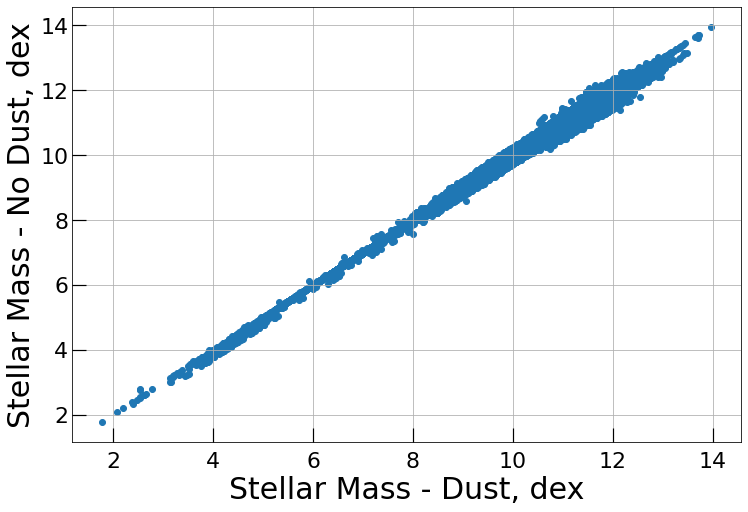

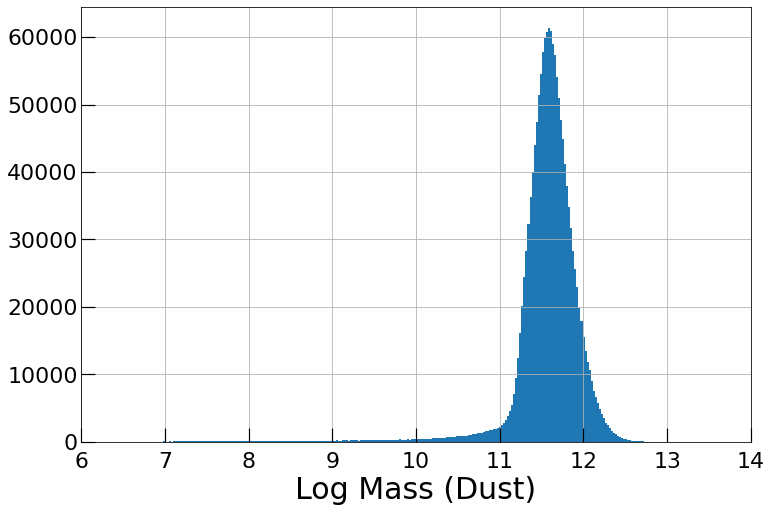

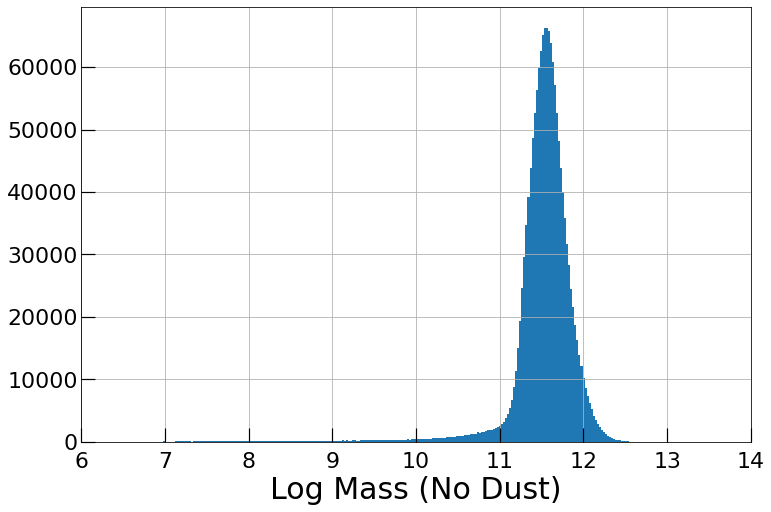

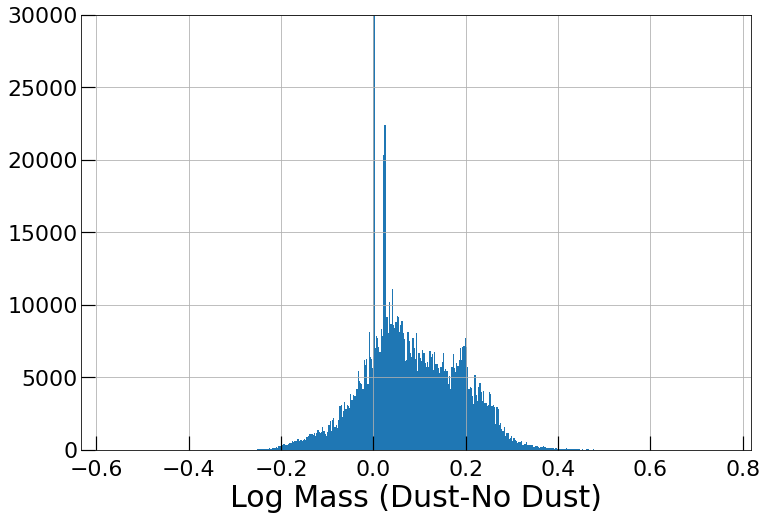

In [7]:
#Complete stellar mass plots

plt.figure(figsize=(12,8))
plt.grid()
#plt.xscale('log')
#plt.yscale('log')

plt.scatter(StellarMassDust_data.field(17), StellarMassNoDust_data.field(17))

plt.xlabel('Stellar Mass - Dust, dex', size = 30)
plt.ylabel('Stellar Mass - No Dust, dex', size = 30)

plt.figure(figsize=(12,8))
plt.grid()

#Dust
plt.xlabel('Log Mass (Dust)', size = 30)
plt.xlim((6,14))
plt.hist(StellarMassDust_data.field(17), bins=500)
plt.show()

plt.figure(figsize=(12,8))
plt.grid()

#No Dust
plt.xlabel('Log Mass (No Dust)', size = 30)
plt.xlim((6,14))
plt.hist(StellarMassNoDust_data.field(17), bins=500)
plt.show()

plt.figure(figsize=(12,8))
plt.grid()

#Difference
plt.xlabel('Log Mass (Dust-No Dust)', size = 30)
plt.ylim((0,30000))
plt.hist(StellarMassDust_data.field(17) - StellarMassNoDust_data.field(17), bins=500)
plt.show()